<head>Etude rédigé par BOUNGOTO BIBAYI Yoanne</head>

# <span style="color:blue">Ensemble learning:</span>

C'est une technique qui consiste à entraîner plusieurs modèles de machine learning pour ensuite considérer l'ensemble de leurs prédictions.

## <span style="color:blue">Principe:</span>

En regroupant nos modèles tous ensembles (Figure 2), on obtient une meilleur performance que lorsque l'on utilise nos modèles chacun de leur coté.

Prenant 3 modèles de machine learning  modèle 1, modèle 2, modèle 3, et utilisant lès pour effectuer 10 prédictions.  En <span style="color:green">**vert**</span> nous avons les prédictions correctes, en <span style="color:red">**rouge**</span> les prédictions incorrectes. 

On voit donc que nos prédictions ont chacun  de leur coté effectué 70% de bonnes réponses.  Ce qui est intéressant de constater c’est que nos modèles n’ont pas tous fait les mêmes erreurs aux mêmes endroits.  Si on venant à combiner les résultats de nos différents modèles pour garder à chaque fois la prédiction majoritaire, on voit qu’on obtiendra  au total 9 bonnes prédictions sur 10.


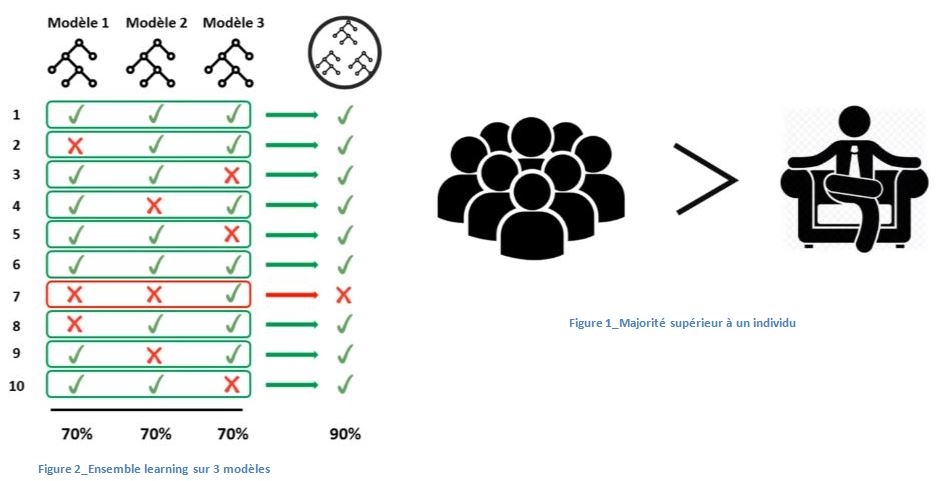

Ce resultat vient d'un phénomène appelé <span style="color:blue">**The Wisdom of the Crowd**</span>. L'idée c'est qu'une foule d'individus a le plus souvent raison qu'un individu tous seul. C'est une idée vieille comme le monde (Figure 1).

>Aristote Dans son ouvrage la politique avait écrit: *La majorité, dont chaque membre pris à part n’est pas un homme remarquable, est cependant au-dessus des hommes supérieurs*.

Ce phénomène est basé sur la <span style="color:blue">**loi des grands nombres**</span>: Plus vous avez de modèles plus la performance collecive s'approche des 100%.
Attention pour que ça fonctionne il faut que notre foule respect deux grands critères: 
<ul>
    <li>Il faut que les modèles soient <strong>grands</strong> (Plus de données).</li>
    <li>Il faut que les modèles (les membres de la foule) aient au moins <strong>50 % de performances</strong>.</li>
    <li>Il faut que notre foule presente un minimum de <strong>diversité</strong>, en Effet si les gens de notre foule pensent tous de la même manière, les défauts des uns ne peuvent pas être corrigés par la force des autres, autant demandé à une seul personne pour savoir ce que toute la foule pense. Voila pourquoi il est important de créer un minimum de diversité (differents ages, sexes, cultures...)</li>
</ul>
    
    

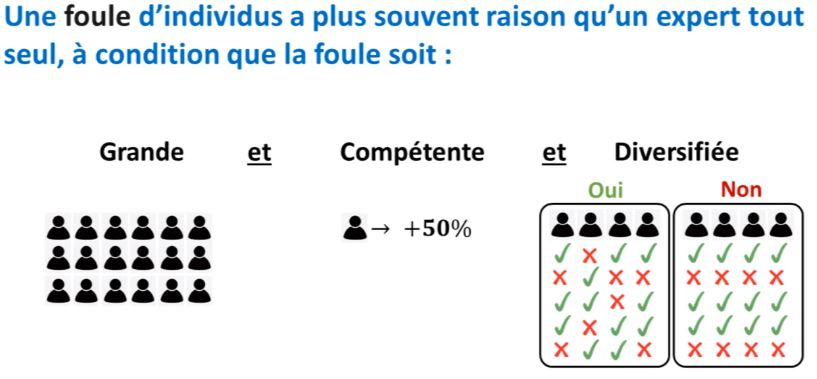

## <span style="color:blue">Résumé</span>

Pour résumer the wisdom of the crowd est un phénomène lié à la loi des grands nombres qui fait qu'une foule d'individus a plus souvent raison qu'un expert seul, à condition que cette foule soit suffisamment grande, compétente et diversifié.

En machine learning on peut utiliser ce concept pour créer des ensembles de modèles qui surpassent les performances des meilleurs modèles de machine learning au monde.
Tout ce qu'il faut c'est de satisfaire c'est 3 critères: <span style="color:blue">**Taille**</span> <span style="color:green">**Performance**</span> et <span style="color:orange">**Diversité**</span>.

Et pour ça, on dispose de 3 grandes techniques qui sont: <span style="color:purple">**le BAGGING le BOOSTING et le STACKING**</span>

# <span style="color:blue">BAGGING</span>

Créer plusieurs copies d'un même modèle, en entrainant chaque copie sur une partie aléatoire du dataset. 

On utilise une technique d'échantillonnage appelée Bootstrapping, technique qui consiste à replacer  après chaque tirage au sort les données qui ont été selectionnées dans notre dataset, de cette manière on obtient une foule des modèles diversifiés puisqu'ils n'ont pas tous été nourrient avec les mêmes données  mais qui partage certaines connaissances en commum. 

Et ça c'est très important pour obtenir des majorités en faveur des bonnes réponses.
L'exemple d'algorithme le plus connu est celui que l'on appel <span style="color:purple">**Random Forest**</span>.

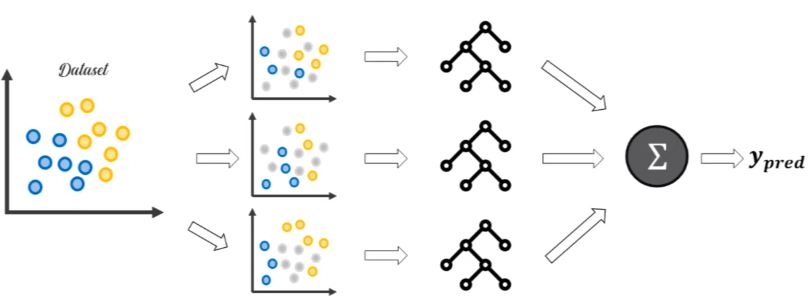

# <span style="color:blue">BOOSTING</span>

L'idée est d'entrainer l'un après l'autre plusieurs modèles relativement faibles en demandant à chaque modèle d'essayé de corriger les erreurs effectuées par son prédécesseur, du coup on obtient un ensemble de modèles parfaitement complementaires dans lesquels les faiblesses des uns sont compensés par les forces des autres.

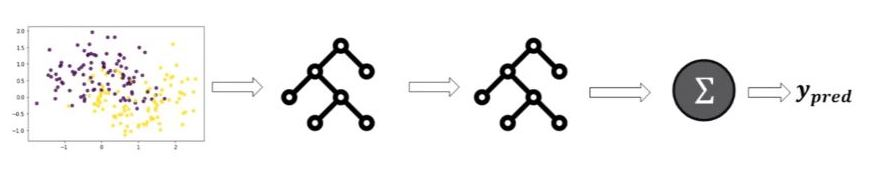

# <span style="color:blue">STACKING</span>

Au lieu de rassembler les prédictions de chaque modèle, on demande à un modèle d'apprendre à prédire le resultat final en fonction de erreurs des prédictions des modèles précédants.


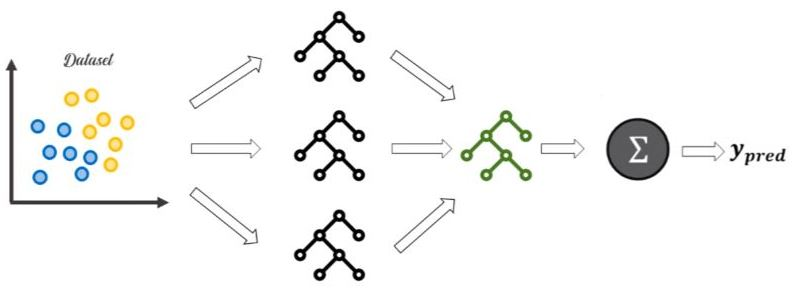

Dans <span style="color:green">**Scikit learn**</span> on va retrouver tous les algorithmes dont on a parlé dans le module ensembles. notamment la classe <span style="color:green">**VotingClassifier**</span> qui est l'implementation le plus basique qui puisse exister d'une foule de <span style="color:blue">**Wisdom of the crowd**</span>. avec cette classe on pourra faire entrer la liste des modèles que l'on veut avoir dans notre foule,les modèles seront entrainés, les résultats seront régroupés sous forme de **vote**.

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

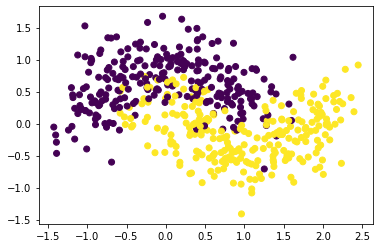

In [27]:
x, y=make_moons(n_samples=500, noise=0.3, random_state=0)
plt.scatter(x[:,0], x[:,1], c=y)

In [28]:
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state=0)

# <span style="color:blue">Voting classifier</span>

In [29]:
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

In [30]:
model_1= SGDClassifier(random_state=0)
model_2= DecisionTreeClassifier(random_state=0)
model_3= KNeighborsClassifier(n_neighbors=2)

model_4= VotingClassifier([('SGD', model_1),
                          ('Tree', model_2),
                          ('KNN', model_3)],
                        voting='hard')


for model in (model_1, model_2, model_3, model_4):
    model.fit(X_train, y_train)
    print(model.__class__.__name__, model.score(X_test, y_test))

SGDClassifier 0.84
DecisionTreeClassifier 0.86
KNeighborsClassifier 0.86
VotingClassifier 0.8733333333333333


## <span style="color:blue">Interpretation:</span>

On obtient une performance finale de 87%, autrement dit notre technique d'ensemble a belle et bien fonctionné. On peut tout de même s'interroger sur les resultats de nos modèles: 0.84, 0.86 0.86 et 0.87. Les resultats sont sensiblement similaires, à t'on respecté le 3ème critère ? à savoir celui de la **diversité** ? certes nos modèles sont performants mais en terme de prédiction ils vont tous à peu près nous dire la même chose. 

# <span style="color:blue">BAGGING</span>

In [31]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [32]:
model= BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=100)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8866666666666667

Nous constatons que le bagging est meilleur qu'une simple technique de vote

In [33]:
model=RandomForestClassifier(n_estimators=100,)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8733333333333333

# <span style="color:blue">BOOSTING</span>

In [34]:
from sklearn.ensemble import AdaBoostClassifier

In [35]:
model=AdaBoostClassifier(n_estimators=100)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.88

# <span style="color:blue">STACKING</span>

In [36]:
from sklearn.ensemble import StackingClassifier

In [37]:
model_4= StackingClassifier([('SGD', model_1),
                          ('Tree', model_2),
                          ('KNN', model_3)],
                        final_estimator=KNeighborsClassifier())

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.88

On obtient encore une fois une performance de 88%

# <span style="color:blue">Conclusion:</span>

On n'a pas mal de fois obtenu une performance de 88% mais ce que l'on a pu voir c'est qu'à chaque fois cette performance était supérieur à celle des modèles individuels.

Bien évidemment nous ne nous sommes pas concentré sur l'utilisation des hyper-paramètres pour d'optimiser nos modèles.

<span style="color:blue">**Bagging vs Boosting**</span>.

Le Bagging, on entraine notre modèle en parralèlle. Chaque modèle est fort mais overfit. La foule permet de réduire la <span style="color:navy">**variance**</span> l'overfiting.

Le Boosting, on entraine notre modèle en serie, chaque modèle est faible, en underfitting. En les construisant les uns par dessus des autres on n'est capable de réduire le <span style="color:blue">**biais**</span>

